In [1]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
import numpy as np

Using TensorFlow backend.


In [2]:
encoding_dim = 32
input_img = Input(shape=(784,))
# "encoded" est la représentation codée de l'entrée
encoded = Dense(encoding_dim, activation='relu')(input_img)
# decoded
decoded = Dense(784, activation='sigmoid')(encoded)
autoencoder = Model(input_img, decoded)

In [3]:
encoder = Model(input_img, encoded)

In [4]:
encoded_input = Input(shape=(encoding_dim,))
# récupérer la dernière couche du modèle d'auto-codeur
decoder_layer = autoencoder.layers[-1]
#decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [5]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [6]:
from sklearn.utils import shuffle
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding

In [7]:
(train_images, train_labels), (x_test, y_test) = mnist.load_data()
train_images = train_images.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
train_images = train_images.reshape((len(train_images), np.prod(train_images.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))


x, y = shuffle(train_images, train_labels, random_state=15)
x_train = x[0:100]
y_train = y[0:100].reshape(-1, 1)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [8]:
print (x_train.shape)
print (x_test.shape)

(100, 784)
(10000, 784)


In [9]:
history=autoencoder.fit(x_train, x_train,
                epochs=200,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 100 samples, validate on 10000 samples
Epoch 1/200
100/100 [==============================] - 0s 2ms/step - loss: 0.6957 - accuracy: 0.3999 - val_loss: 0.6936 - val_accuracy: 0.4147
Epoch 2/200
100/100 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.4210 - val_loss: 0.6913 - val_accuracy: 0.4383
Epoch 3/200
100/100 [==============================] - 0s 974us/step - loss: 0.6913 - accuracy: 0.4444 - val_loss: 0.6888 - val_accuracy: 0.4639
Epoch 4/200
100/100 [==============================] - 0s 1ms/step - loss: 0.6888 - accuracy: 0.4723 - val_loss: 0.6864 - val_accuracy: 0.4860
Epoch 5/200
100/100 [==============================] - 0s 1ms/step - loss: 0.6863 - accuracy: 0.4937 - val_loss: 0.6834 - val_accuracy: 0.5068
Epoch 6/200
100/100 [==============================] - 0s 1ms/step - loss: 0.6834 - accuracy: 0.5165 - val_loss: 0.6799 - val_accuracy: 0.5271
Epoch 7/200
100/100 [==============================] - 0s 1ms/step - loss: 0.6799 - accuracy

Epoch 58/200
100/100 [==============================] - 0s 1ms/step - loss: 0.2589 - accuracy: 0.8110 - val_loss: 0.2832 - val_accuracy: 0.7973
Epoch 59/200
100/100 [==============================] - 0s 1ms/step - loss: 0.2579 - accuracy: 0.8110 - val_loss: 0.2823 - val_accuracy: 0.7973
Epoch 60/200
100/100 [==============================] - 0s 1ms/step - loss: 0.2570 - accuracy: 0.8111 - val_loss: 0.2815 - val_accuracy: 0.7974
Epoch 61/200
100/100 [==============================] - 0s 1ms/step - loss: 0.2560 - accuracy: 0.8111 - val_loss: 0.2807 - val_accuracy: 0.7975
Epoch 62/200
100/100 [==============================] - 0s 1ms/step - loss: 0.2551 - accuracy: 0.8111 - val_loss: 0.2798 - val_accuracy: 0.7977
Epoch 63/200
100/100 [==============================] - 0s 1ms/step - loss: 0.2542 - accuracy: 0.8112 - val_loss: 0.2790 - val_accuracy: 0.7978
Epoch 64/200
100/100 [==============================] - 0s 1ms/step - loss: 0.2533 - accuracy: 0.8114 - val_loss: 0.2782 - val_accuracy:

Epoch 115/200
100/100 [==============================] - 0s 1ms/step - loss: 0.2065 - accuracy: 0.8105 - val_loss: 0.2395 - val_accuracy: 0.7967
Epoch 116/200
100/100 [==============================] - 0s 1ms/step - loss: 0.2057 - accuracy: 0.8105 - val_loss: 0.2388 - val_accuracy: 0.7967
Epoch 117/200
100/100 [==============================] - 0s 992us/step - loss: 0.2048 - accuracy: 0.8105 - val_loss: 0.2382 - val_accuracy: 0.7967
Epoch 118/200
100/100 [==============================] - 0s 991us/step - loss: 0.2040 - accuracy: 0.8106 - val_loss: 0.2375 - val_accuracy: 0.7967
Epoch 119/200
100/100 [==============================] - 0s 994us/step - loss: 0.2032 - accuracy: 0.8106 - val_loss: 0.2369 - val_accuracy: 0.7967
Epoch 120/200
100/100 [==============================] - 0s 987us/step - loss: 0.2023 - accuracy: 0.8107 - val_loss: 0.2363 - val_accuracy: 0.7967
Epoch 121/200
100/100 [==============================] - 0s 1ms/step - loss: 0.2015 - accuracy: 0.8107 - val_loss: 0.2357 

Epoch 172/200
100/100 [==============================] - 0s 1ms/step - loss: 0.1682 - accuracy: 0.8139 - val_loss: 0.2130 - val_accuracy: 0.7978
Epoch 173/200
100/100 [==============================] - 0s 939us/step - loss: 0.1676 - accuracy: 0.8140 - val_loss: 0.2127 - val_accuracy: 0.7978
Epoch 174/200
100/100 [==============================] - 0s 969us/step - loss: 0.1671 - accuracy: 0.8140 - val_loss: 0.2124 - val_accuracy: 0.7979
Epoch 175/200
100/100 [==============================] - 0s 1ms/step - loss: 0.1666 - accuracy: 0.8141 - val_loss: 0.2121 - val_accuracy: 0.7979
Epoch 176/200
100/100 [==============================] - 0s 1ms/step - loss: 0.1661 - accuracy: 0.8142 - val_loss: 0.2118 - val_accuracy: 0.7979
Epoch 177/200
100/100 [==============================] - 0s 1ms/step - loss: 0.1656 - accuracy: 0.8143 - val_loss: 0.2115 - val_accuracy: 0.7979
Epoch 178/200
100/100 [==============================] - 0s 1ms/step - loss: 0.1651 - accuracy: 0.8144 - val_loss: 0.2112 - va

In [10]:
# encode and decode some digits
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

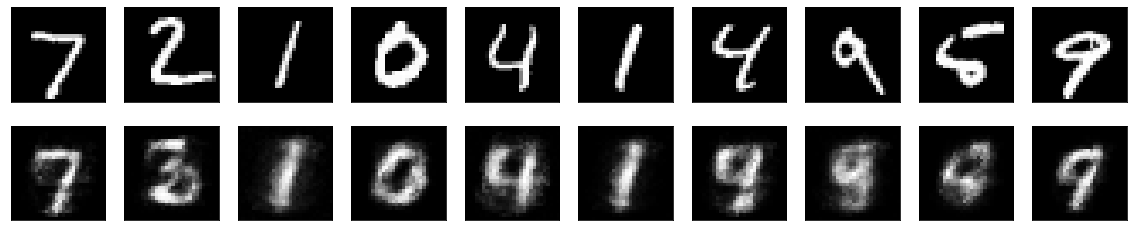

In [11]:
import matplotlib.pyplot as plt

n = 10 
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

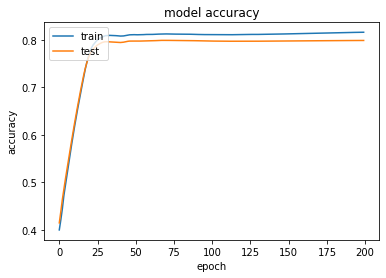

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

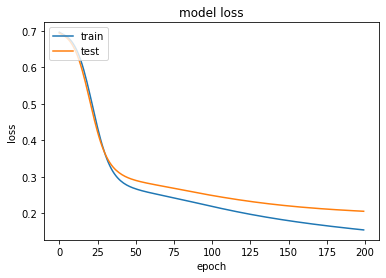

In [13]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [14]:
history.history['val_accuracy'] # accuracy = 79%

[0.41466963291168213,
 0.43829092383384705,
 0.46391499042510986,
 0.4859766662120819,
 0.5068020224571228,
 0.5270884037017822,
 0.5471855998039246,
 0.56693434715271,
 0.5865072011947632,
 0.6057877540588379,
 0.6245991587638855,
 0.6428167223930359,
 0.6604285836219788,
 0.6776567697525024,
 0.6944209933280945,
 0.7106683850288391,
 0.7259924411773682,
 0.7396970987319946,
 0.7515218257904053,
 0.761375904083252,
 0.7695013880729675,
 0.7758169770240784,
 0.7801949977874756,
 0.7834092974662781,
 0.786361038684845,
 0.7889215350151062,
 0.7908123731613159,
 0.7925115823745728,
 0.7940104007720947,
 0.7950459122657776,
 0.795628011226654,
 0.7957025766372681,
 0.7955984473228455,
 0.7954000234603882,
 0.7952188849449158,
 0.7950937747955322,
 0.7949072122573853,
 0.7945922613143921,
 0.7942413091659546,
 0.7940743565559387,
 0.7940841913223267,
 0.7943123579025269,
 0.794735848903656,
 0.7953763008117676,
 0.7960928678512573,
 0.7967060804367065,
 0.7970315217971802,
 0.7971178889274